# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings

# ignore all DeprecationWarning warnings
warnings.filterwarnings("ignore")

# your code here


In [3]:
df = pd.read_csv('./insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

# Information about Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check null values in Dataset

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Distribution of Age feature

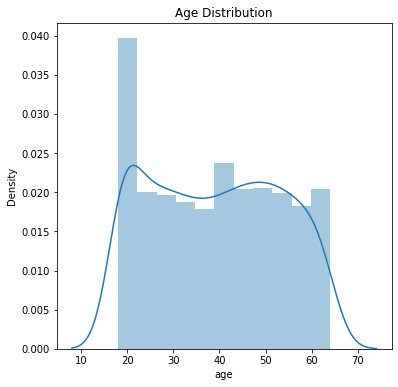

In [9]:
# sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

# Gender Distribution

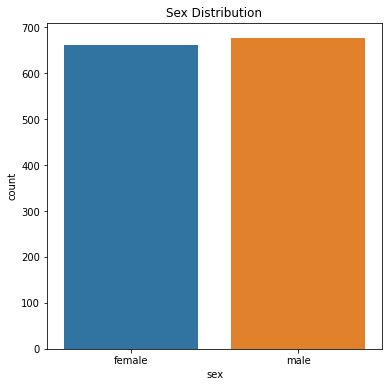

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

# BMI Distribution

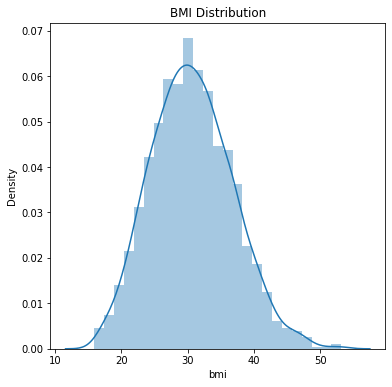

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI Distribution")
plt.show()

# No of Childrens

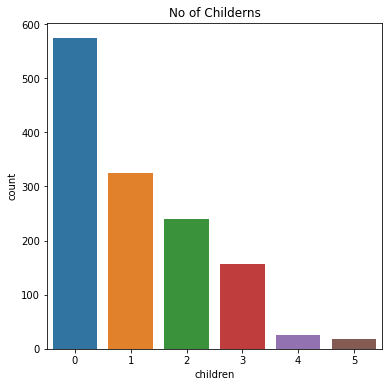

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('No of Childerns')
plt.show()

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Smoker and non smoker Distribution

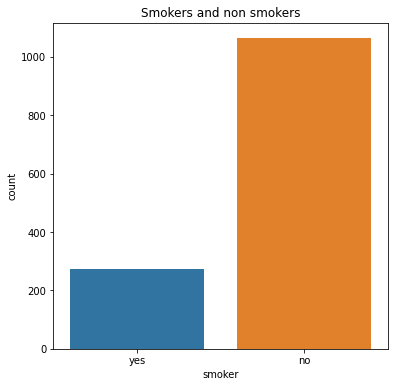

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = df)
plt.title('Smokers and non smokers')
plt.show()

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# Region Based Distribution of people

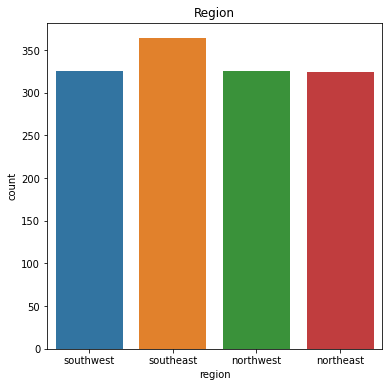

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Charges Distribution

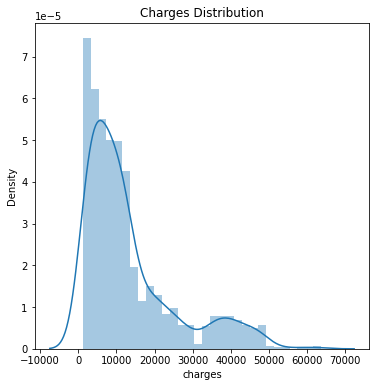

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Preprocessing

In [20]:
# encoding of sex column
df.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace=True)

# encoding of smoker column
df.replace({'smoker' : {'yes' : 0, 'no' : 1}}, inplace=True)

# encoding of region column
df.replace({'region' : {'southeast' : 0, 'southwest' : 1, 
                       'northeast' : 2, 'northwest' : 3}}, inplace=True)

# encoding of sex column
df.replace({'sex' : {'male' : 0, 'female' : 1}}, inplace=True)

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Seperate Independent and Dependent Features

In [22]:
X = df.drop(columns=['charges'], axis=1)
Y = df['charges']

In [23]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Spltting data into Training & Testing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,  random_state=0)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training

# 1. Linear Regression

In [27]:
lr_model = LinearRegression()

In [28]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [29]:
lr_train_pred = lr_model.predict(X_train)
lr_train_r2_score =  r2_score(Y_train, lr_train_pred)
print('R squared value : ', lr_train_r2_score)

R squared value :  0.7367384013702084


In [30]:
lr_test_pred = lr_model.predict(X_test)
lr_test_r2_score = r2_score(Y_test, lr_test_pred)
print('R squared value of testing data : ', lr_test_r2_score)

R squared value of testing data :  0.7989875396812892


In [31]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr_model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3791.46686472]
The insurance cost is USD  3791.4668647162543


In [32]:
# define the parameter values that should be searched
param_grid = {'normalize': [True, False],
              'fit_intercept': [True, False],
              'copy_X': [True, False],
              'n_jobs': [None, -1, 1]}

# create a linear regression model
model = LinearRegression()

# create a grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# fit the grid search object to the training data
grid.fit(X_train, Y_train)

# print the best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}
Best Score: 0.7307400233722617


In [33]:
lr_test_pred = grid.predict(X_test)
lr_test_r2_score = r2_score(Y_test, lr_test_pred)
print('R squared value of testing data : ', lr_test_r2_score)

R squared value of testing data :  0.7989875396812892


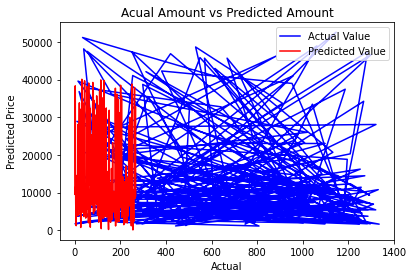

In [34]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(lr_test_pred, color='red', label='Predicted Value')
plt.title('Acual Amount vs Predicted Amount')
plt.xlabel('Actual')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# 2. SVM Model

In [35]:
from sklearn.svm import SVR

In [36]:
svr = SVR(kernel='linear')
svr.fit(X_train, Y_train)

SVR(kernel='linear')

In [37]:
svr_train_pred = svr.predict(X_train)
svr_train_acc = r2_score(Y_train, svr_train_pred)
print(svr_train_acc
    )

-0.15073910964301196


In [38]:
svr_train_mse = mean_squared_error(Y_train, svr_train_pred)
np.sqrt(svr_train_mse)

12844.33868598971

# GridSearchCV for SVR

In [39]:
parameters = [{'C' : [1,10,100,1000], 'kernel' : ['linear']},
             {'C' : [1,10,100,1000], 'kernel': ['rbf'],'gamma' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search = GridSearchCV(estimator= SVR(), param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

grid_search = grid_search.fit(X_train, Y_train)

In [40]:
svm_training_prediction = grid_search.predict(X_train)
svm_training_r2 = r2_score(svm_training_prediction, Y_train)
print('Training accuracy of SVC model : ',(round(svm_training_r2, 2)*100))

Training accuracy of SVC model :  -1052.0


In [42]:
svm_testing_prediction = grid_search.predict(X_test)
svm_testing_r2 = r2_score(svm_testing_prediction, Y_test)
print('Training accuracy of SVC model : ',svm_testing_r2)

Training accuracy of SVC model :  -11.516460745717895


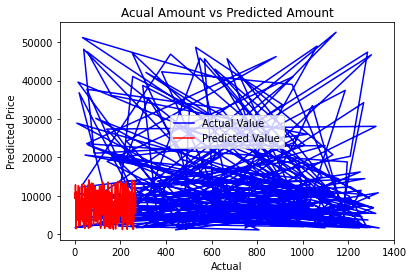

In [43]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(svm_testing_prediction, color='red', label='Predicted Value')
plt.title('Acual Amount vs Predicted Amount')
plt.xlabel('Actual')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Decission Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor


In [45]:
dt = DecisionTreeRegressor()

In [46]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [47]:
dt_train_pred = dt.predict(X_train)
dt_train_r2score = r2_score(dt_train_pred, Y_train)
print(dt_train_r2score)

0.9982934859315719


In [48]:
dt_test_pred = dt.predict(X_test)
dt_test_r2score = r2_score(dt_test_pred, Y_test)
print(dt_test_r2score)

0.7118406683183358


# GridSearchCV for DTree regressor

In [49]:
parameters = {'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
                'splitter' : ['best', 'random'],

             }

dt_grid = GridSearchCV(estimator=dt, param_grid=parameters,
                      cv=5)
dt_grid.fit(X_train, Y_train)

print('Best parameters : ', dt_grid.best_params_)
print("Best Score:", grid.best_score_)

Best parameters :  {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'best'}
Best Score: 0.7307400233722617


In [50]:
dt_train_pred = dt_grid.predict(X_train)
dt_train_r2score = r2_score(dt_train_pred, Y_train)
print(dt_train_r2score)

0.8327200550627729


In [51]:
dt_test_pred = dt_grid.predict(X_test)
dt_test_r2score = r2_score(dt_test_pred, Y_test)
print(dt_test_r2score)

0.8861326675503202


# Random Forest Regressor Model

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [55]:
rf_train_pred = rf.predict(X_train)
rf_train_r2_score = r2_score(Y_train, rf_train_pred)
print(rf_train_r2_score)

0.973874798566026


In [56]:
rf_test_pred = rf.predict(X_test)
rf_test_r2_score = r2_score(Y_test, rf_test_pred)
print(rf_test_r2_score)

0.8772161940863155


# Apply Gridsearchcv on rf

In [57]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [58]:
rf = RandomForestRegressor()

In [59]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [60]:
grid_search.fit(X_train, Y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [61]:
rf_train_prediction = grid_search.predict(X_train)
rf_train_r2score = r2_score(Y_train, rf_train_prediction)
print("R2_Score on training data : ", rf_train_r2score)

R2_Score on training data :  0.9004351442672817


In [63]:
rf_test_prediction = grid_search.predict(X_test)
rf_test_r2score = r2_score(Y_test, rf_test_prediction)
print("R2_Score on testing data : ", rf_test_r2score)

R2_Score on testing data :  0.8975245825227796
